<a href="https://colab.research.google.com/github/isha0803/ML_Practicals/blob/main/P6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
import pandas as pd
dataset = pd.read_csv("Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


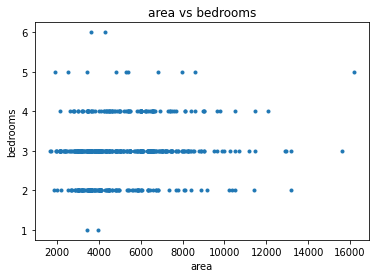

In [6]:
a1 = dataset["area"]
a2 = dataset["bedrooms"]
import matplotlib.pyplot as plt
plt.title("area vs bedrooms")
plt.xlabel("area")
plt.ylabel("bedrooms")
plt.plot(a1,a2,'.')
plt.show()

In [7]:
import numpy as np
std1 = (a1-np.mean(a1))/np.std(a1)
std2 = (a2-np.mean(a2))/np.std(a2)
std3 = np.array([std1.T, std2.T])

In [8]:
covariance = np.cov(np.array([std1,std2]))

In [9]:
from numpy import linalg as LA
eigen_val, eigen_vectors = LA.eig(covariance)
print(eigen_val)
print(eigen_vectors)

[0.8497006  1.15397587]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [10]:
new_feature = np.matmul(std3.T, eigen_vectors[1:].T)
new_feature[:5 :]

array([[-0.25222009],
       [ 0.25002601],
       [ 1.53509636],
       [-0.22612938],
       [-0.25222009]])

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs[:5, :]

array([[1.7325146 ],
       [2.23476069],
       [1.60195799],
       [1.75860531],
       [1.7325146 ]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs

array([[ 1.7325146 , -0.25222009],
       [ 2.23476069,  0.25002601],
       [ 1.60195799,  1.53509636],
       ...,
       [-1.424667  ,  0.42634443],
       [-0.69728549, -0.76414712],
       [-0.39071969, -0.45758132]])